<a href="https://colab.research.google.com/github/webabdullah/data_science/blob/gh-pages/weatherAUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#call libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#load data

In [6]:
df= pd.read_csv("weatherAUS.csv")

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#Extract column names for future reference

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#Preprocessing

In [ ]:
#Check dataset for null values

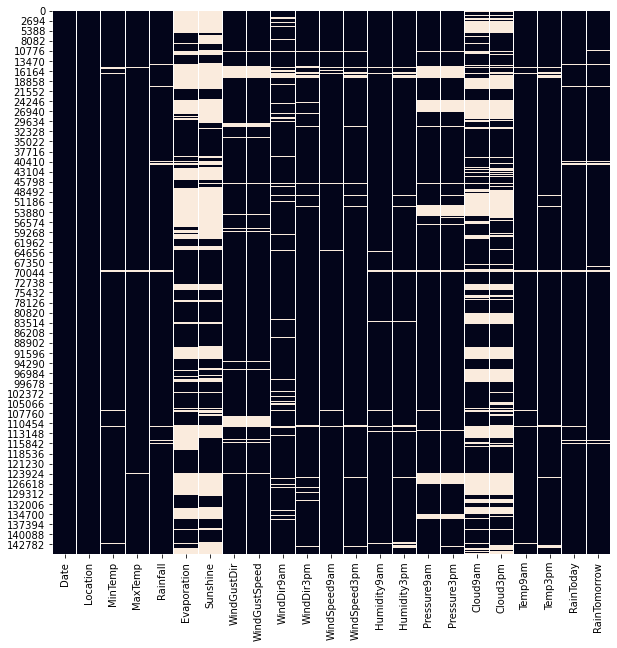

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
#Drop all records containing even one null value

In [ ]:
df.dropna(inplace=True)

In [ ]:
#Check null values now

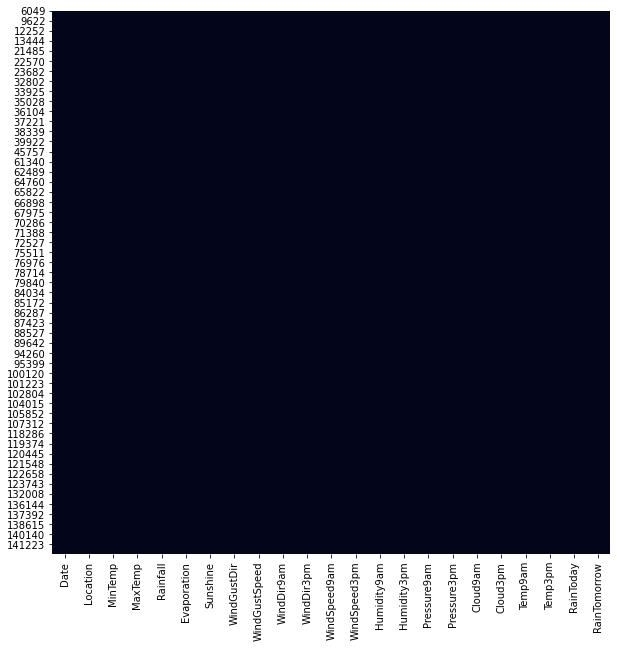

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
#Reset Index since many records have been deleted


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
#Assess which columns can be used for an ml model, and which ones would simply be to complicated to operate on

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3

In [ ]:
#Hence drop unwanted columns

In [ ]:
df.drop(['Date', 'Location','WindDir9am', 'WindDir3pm'],axis=1,inplace=True)

In [ ]:
#Check columns now

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustDir    56420 non-null  object 
 6   WindGustSpeed  56420 non-null  float64
 7   WindSpeed9am   56420 non-null  float64
 8   WindSpeed3pm   56420 non-null  float64
 9   Humidity9am    56420 non-null  float64
 10  Humidity3pm    56420 non-null  float64
 11  Pressure9am    56420 non-null  float64
 12  Pressure3pm    56420 non-null  float64
 13  Cloud9am       56420 non-null  float64
 14  Cloud3pm       56420 non-null  float64
 15  Temp9am        56420 non-null  float64
 16  Temp3pm        56420 non-null  float64
 17  RainToday      56420 non-null  object 
 18  RainTo

In [ ]:
#Extrapolate meaningful and usable (binary) data from 'WindGustDir' column into
#fN indicating 'From North', 
#fS indicating 'From South',
#fW indicating 'From West',
#fE is IGNORED since if all the other columns are 0 it is automatically assumed From East

In [ ]:
def swap1(x):
    if x[0]=="N":
        return 1
    else:
        return 0

In [ ]:
def swap2(x):
    if x[0]=="S":
        return 1
    else:
        return 0

In [ ]:
def swap3(x):
    if x[0]=="W":
        return 1
    else:
        return 0

In [ ]:
df["fN"]=df["WindGustDir"].apply(swap1)
df["fS"]=df["WindGustDir"].apply(swap2)
df["fW"]=df["WindGustDir"].apply(swap3)

In [ ]:
#View extrapolated information to verify validity

In [ ]:
df[["WindGustDir","fN","fS","fW"]].head()

,WindGustDir,fN,fS,fW
0,SSW,0,1,0
1,S,0,1,0
2,NNE,1,0,0
3,WNW,0,0,1
4,WNW,0,0,1


In [ ]:
#We must now repeat the same to extrapolate meaning from the end direction, 
#tN indicating 'to North', 
#tS indicating 'to South',
#tW indicating 'to West',
#tE indicating 'to East', this column is not ignored here since sometimes there is no end direction

In [ ]:
df["WindGustDir"].loc[0][-1:] #Checking how to call last element of WindGustDir element, [-1:] means last character

'W'

In [ ]:
len(df["WindGustDir"].loc[0]) #Checking how to call length of WindGustDir element

3

In [ ]:
def backswap1(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="N":
            return 1
        else:
            return 0

In [ ]:
def backswap2(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="E":
            return 1
        else:
            return 0

In [ ]:
def backswap3(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="S":
            return 1
        else:
            return 0

In [8]:
def backswap4(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="W":
            return 1
        else:
            return 0

In [ ]:
df["tN"]=df["WindGustDir"].apply(backswap1)
df["tE"]=df["WindGustDir"].apply(backswap2)
df["tS"]=df["WindGustDir"].apply(backswap3)
df["tW"]=df["WindGustDir"].apply(backswap4)

In [ ]:
#View extrapolated information to verify validity

In [ ]:
df[["WindGustDir","fN","fS","fW","tN","tE","tS","tW"]].head()

,WindGustDir,fN,fS,fW,tN,tE,tS,tW
0,SSW,0,1,0,0,0,0,1
1,S,0,1,0,0,0,0,0
2,NNE,1,0,0,0,1,0,0
3,WNW,0,0,1,0,0,0,1
4,WNW,0,0,1,0,0,0,1


In [ ]:
#Checking preprocessed dataset so far

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustDir    56420 non-null  object 
 6   WindGustSpeed  56420 non-null  float64
 7   WindSpeed9am   56420 non-null  float64
 8   WindSpeed3pm   56420 non-null  float64
 9   Humidity9am    56420 non-null  float64
 10  Humidity3pm    56420 non-null  float64
 11  Pressure9am    56420 non-null  float64
 12  Pressure3pm    56420 non-null  float64
 13  Cloud9am       56420 non-null  float64
 14  Cloud3pm       56420 non-null  float64
 15  Temp9am        56420 non-null  float64
 16  Temp3pm        56420 non-null  float64
 17  RainToday      56420 non-null  object 
 18  RainTo

In [ ]:
#Removing 'WindGustDir' column, now that we extrapolated information we longer need it in dataset

In [ ]:
df.drop("WindGustDir",axis=1,inplace=True)

In [ ]:
#Checking data type of 'RainToday' and 'RainTomorrow' columns

In [ ]:
df[["RainToday","RainTomorrow"]].head()

,RainToday,RainTomorrow
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No


In [ ]:
#Our logistic regression model will not work with boolean/categorical data, we need to convert this to binary

In [ ]:
marker1=pd.get_dummies(df["RainToday"],drop_first=True)
marker2=pd.get_dummies(df["RainTomorrow"],drop_first=True)

In [ ]:
df["RainToday"]=marker1
df["RainTomorrow"]=marker2

In [ ]:
#Check now

In [ ]:
df[["RainToday","RainTomorrow"]].head()

In [2]:

df.info() #Check all columns now

NameError: ignored

In [ ]:
#Preprocessing Complete, Save new dataset to csv file

In [ ]:
df.to_csv("preprocessed_data.csv")

In [ ]:
#Carry out Machine Learning Phase

In [ ]:
#Import libraries and models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Split dataset into input and output columns (x) & (y)

In [ ]:

x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

In [ ]:
#Split dataset into 2 new datasets, Train Data (x) & Test Data (y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
#Train the model with input and desired output from train data

In [ ]:
lm=LogisticRegression()

In [ ]:
lm.fit(x_train,y_train)

C:\Users\Xabier\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Model is now created, we can now test it by only feeding input from Test Data

In [ ]:

pred=lm.predict(x_test)

In [ ]:
#Call evaluation libraries

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#Evaluate accuracy of your model by comparing your Predicted Output vs. Actual Output for Test Data

In [9]:
print(classification_report(y_test,pred))

NameError: ignored